# Análisis ETL de Demanda Energética y Variables Meteorológicas

## Proyecto de Ciencia de Datos - Predicción de Demanda Eléctrica

**Objetivo:** Realizar el proceso ETL completo sobre los datasets de energía y variables meteorológicas para predecir la demanda de energía eléctrica en la próxima hora.

**Datasets:**
- `energy_dataset.csv`: Información horaria de consumo, generación y precios a nivel país
- `weather_features.csv`: Información meteorológica por ciudad y por hora

**Proceso ETL:**
1. Exploración y análisis de calidad de datos
2. Limpieza y tratamiento de datos faltantes/erróneos
3. Unificación de fuentes mediante merge temporal
4. Selección y creación de variables derivadas
5. Preparación del dataset final
6. Visualización y análisis estadístico

In [88]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 Numpy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")

✅ Librerías importadas correctamente
📊 Pandas version: 2.3.3
🔢 Numpy version: 2.3.4
📈 Matplotlib version: 3.10.7
🎨 Seaborn version: 0.13.2


## 1. Carga de Datos y Exploración Inicial

En esta sección cargaremos ambos datasets y realizaremos una primera exploración para entender su estructura y características básicas.

In [89]:
# Carga de datasets
print("🔄 Cargando datasets...")

# Dataset de energía
energy_df = pd.read_csv('energy_dataset.csv')
print(f"✅ Energy dataset cargado: {energy_df.shape[0]} filas, {energy_df.shape[1]} columnas")

# Dataset de clima
weather_df = pd.read_csv('weather_features.csv')
print(f"✅ Weather dataset cargado: {weather_df.shape[0]} filas, {weather_df.shape[1]} columnas")

print("\n" + "="*60)
print("📊 RESUMEN DE DATASETS CARGADOS")
print("="*60)

🔄 Cargando datasets...
✅ Energy dataset cargado: 35064 filas, 29 columnas
✅ Weather dataset cargado: 178396 filas, 17 columnas

📊 RESUMEN DE DATASETS CARGADOS
✅ Weather dataset cargado: 178396 filas, 17 columnas

📊 RESUMEN DE DATASETS CARGADOS


In [90]:
# Exploración del dataset de energía
print("🔋 DATASET DE ENERGÍA (energy_dataset.csv)")
print("-" * 50)
print(f"Dimensiones: {energy_df.shape}")
print(f"Período de datos: {energy_df['time'].min()} a {energy_df['time'].max()}")

print("\n📋 Columnas disponibles:")
for i, col in enumerate(energy_df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n📊 Información básica:")
print(energy_df.info())

print("\n🔍 Primeras 3 filas:")
display(energy_df.head(3))

🔋 DATASET DE ENERGÍA (energy_dataset.csv)
--------------------------------------------------
Dimensiones: (35064, 29)
Período de datos: 2015-01-01 00:00:00+01:00 a 2018-12-31 23:00:00+01:00

📋 Columnas disponibles:
 1. time
 2. generation biomass
 3. generation fossil brown coal/lignite
 4. generation fossil coal-derived gas
 5. generation fossil gas
 6. generation fossil hard coal
 7. generation fossil oil
 8. generation fossil oil shale
 9. generation fossil peat
10. generation geothermal
11. generation hydro pumped storage aggregated
12. generation hydro pumped storage consumption
13. generation hydro run-of-river and poundage
14. generation hydro water reservoir
15. generation marine
16. generation nuclear
17. generation other
18. generation other renewable
19. generation solar
20. generation waste
21. generation wind offshore
22. generation wind onshore
23. forecast solar day ahead
24. forecast wind offshore eday ahead
25. forecast wind onshore day ahead
26. total load forecast
27

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48


In [91]:
# Exploración del dataset de clima
print("\n" + "="*60)
print("🌤️ DATASET DE CLIMA (weather_features.csv)")
print("-" * 50)
print(f"Dimensiones: {weather_df.shape}")
print(f"Período de datos: {weather_df['dt_iso'].min()} a {weather_df['dt_iso'].max()}")

print("\n📋 Columnas disponibles:")
for i, col in enumerate(weather_df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n🏙️ Ciudades únicas:")
cities = weather_df['city_name'].unique()
print(f"Total de ciudades: {len(cities)}")
print("Ciudades:", ', '.join(cities))

print("\n📊 Información básica:")
print(weather_df.info())

print("\n🔍 Primeras 3 filas:")
display(weather_df.head(3))


🌤️ DATASET DE CLIMA (weather_features.csv)
--------------------------------------------------
Dimensiones: (178396, 17)
Período de datos: 2015-01-01 00:00:00+01:00 a 2018-12-31 23:00:00+01:00

📋 Columnas disponibles:
 1. dt_iso
 2. city_name
 3. temp
 4. temp_min
 5. temp_max
 6. pressure
 7. humidity
 8. wind_speed
 9. wind_deg
10. rain_1h
11. rain_3h
12. snow_3h
13. clouds_all
14. weather_id
15. weather_main
16. weather_description
17. weather_icon

🏙️ Ciudades únicas:
Total de ciudades: 5
Ciudades: Valencia, Madrid, Bilbao,  Barcelona, Seville

📊 Información básica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   t

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [92]:
# Análisis temporal y alineamiento de datasets
print("="*60)
print("⏰ ANÁLISIS TEMPORAL")
print("="*60)

# Convertir columnas de tiempo a datetime (manejo de timezone)
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True)

print("🔋 Dataset de Energía:")
print(f"   📅 Fecha inicial: {energy_df['time'].min()}")
print(f"   📅 Fecha final:   {energy_df['time'].max()}")
print(f"   ⏱️  Registros totales: {len(energy_df):,}")

print("\n🌤️ Dataset de Clima:")
print(f"   📅 Fecha inicial: {weather_df['dt_iso'].min()}")
print(f"   📅 Fecha final:   {weather_df['dt_iso'].max()}")
print(f"   ⏱️  Registros totales: {len(weather_df):,}")
print(f"   🏙️ Registros por ciudad: {len(weather_df) / len(weather_df['city_name'].unique()):,.0f}")

# Verificar solapamiento temporal
energy_start, energy_end = energy_df['time'].min(), energy_df['time'].max()
weather_start, weather_end = weather_df['dt_iso'].min(), weather_df['dt_iso'].max()

overlap_start = max(energy_start, weather_start)
overlap_end = min(energy_end, weather_end)

print(f"\n🔄 Período de solapamiento:")
print(f"   📅 Desde: {overlap_start}")
print(f"   📅 Hasta: {overlap_end}")
print(f"   📊 Duración: {(overlap_end - overlap_start).days} días")

# Análisis de frecuencia temporal de manera más robusta
print(f"\n📈 Análisis de frecuencia temporal:")

# Para energía
energy_sorted = energy_df['time'].sort_values()
energy_diff = energy_sorted.diff().dropna()
energy_mode_diff = energy_diff.mode()[0] if len(energy_diff) > 0 else None
print(f"   🔋 Energía - Diferencia más común: {energy_mode_diff}")

# Para clima (usando Madrid como ejemplo)
madrid_weather = weather_df[weather_df['city_name'] == 'Madrid'].sort_values('dt_iso')
weather_diff = madrid_weather['dt_iso'].diff().dropna()
weather_mode_diff = weather_diff.mode()[0] if len(weather_diff) > 0 else None
print(f"   🌤️ Clima - Diferencia más común: {weather_mode_diff}")

# Verificar si hay registros faltantes en la secuencia temporal
print(f"\n🔍 Verificación de continuidad temporal:")
energy_expected = pd.date_range(start=energy_start, end=energy_end, freq='H')
energy_missing = len(energy_expected) - len(energy_df)
print(f"   🔋 Energía - Registros esperados: {len(energy_expected):,}, Actuales: {len(energy_df):,}, Faltantes: {energy_missing:,}")

weather_expected = pd.date_range(start=weather_start, end=weather_end, freq='H')
weather_per_city = len(weather_expected)
weather_total_expected = weather_per_city * len(weather_df['city_name'].unique())
weather_missing = weather_total_expected - len(weather_df)
print(f"   🌤️ Clima - Registros esperados: {weather_total_expected:,}, Actuales: {len(weather_df):,}, Faltantes: {weather_missing:,}")

⏰ ANÁLISIS TEMPORAL
🔋 Dataset de Energía:
   📅 Fecha inicial: 2014-12-31 23:00:00+00:00
   📅 Fecha final:   2018-12-31 22:00:00+00:00
   ⏱️  Registros totales: 35,064

🌤️ Dataset de Clima:
   📅 Fecha inicial: 2014-12-31 23:00:00+00:00
   📅 Fecha final:   2018-12-31 22:00:00+00:00
   ⏱️  Registros totales: 178,396
   🏙️ Registros por ciudad: 35,679

🔄 Período de solapamiento:
   📅 Desde: 2014-12-31 23:00:00+00:00
   📅 Hasta: 2018-12-31 22:00:00+00:00
   📊 Duración: 1460 días

📈 Análisis de frecuencia temporal:
   🔋 Energía - Diferencia más común: 0 days 01:00:00
   🌤️ Clima - Diferencia más común: 0 days 01:00:00

🔍 Verificación de continuidad temporal:
   🔋 Energía - Registros esperados: 35,064, Actuales: 35,064, Faltantes: 0
   🌤️ Clima - Registros esperados: 175,320, Actuales: 178,396, Faltantes: -3,076
🔋 Dataset de Energía:
   📅 Fecha inicial: 2014-12-31 23:00:00+00:00
   📅 Fecha final:   2018-12-31 22:00:00+00:00
   ⏱️  Registros totales: 35,064

🌤️ Dataset de Clima:
   📅 Fecha ini

## 2. Análisis de Calidad de Datos

En esta sección identificaremos y analizaremos:
- **Valores faltantes (NaN/null)**
- **Datos erróneos o inconsistentes** 
- **Duplicados**
- **Outliers extremos**
- **Problemas de tipos de datos**

In [93]:
# Análisis de valores faltantes
print("="*60)
print("🔍 ANÁLISIS DE VALORES FALTANTES")
print("="*60)

def analyze_missing_values(df, dataset_name):
    print(f"\n{dataset_name}:")
    print("-" * len(dataset_name) + ":")
    
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Columna': missing_count.index,
        'Valores_Faltantes': missing_count.values,
        'Porcentaje': missing_percent.values
    }).sort_values('Valores_Faltantes', ascending=False)
    
    # Mostrar solo columnas con valores faltantes
    missing_with_nulls = missing_df[missing_df['Valores_Faltantes'] > 0]
    
    if len(missing_with_nulls) > 0:
        print(f"❗ Se encontraron valores faltantes:")
        display(missing_with_nulls)
    else:
        print("✅ No se encontraron valores faltantes")
    
    return missing_df

# Analizar ambos datasets
energy_missing = analyze_missing_values(energy_df, "🔋 Dataset de Energía")
weather_missing = analyze_missing_values(weather_df, "🌤️ Dataset de Clima")

🔍 ANÁLISIS DE VALORES FALTANTES

🔋 Dataset de Energía:
--------------------:
❗ Se encontraron valores faltantes:


,Columna,Valores_Faltantes,Porcentaje
10,generation hydro pumped storage aggregated,35064,100.000000
23,forecast wind offshore eday ahead,35064,100.000000
26,total load actual,36,0.102669
12,generation hydro run-of-river and poundage,19,0.054187
11,generation hydro pumped storage consumption,19,0.054187
19,generation waste,19,0.054187
14,generation marine,19,0.054187
6,generation fossil oil,19,0.054187
1,generation biomass,19,0.054187
8,generation fossil peat,18,0.051335



🌤️ Dataset de Clima:
-------------------:
✅ No se encontraron valores faltantes



🗺️ VISUALIZACIÓN DE VALORES FALTANTES (HEATMAP)
Visualizando mapa de calor para el dataset de Energía...


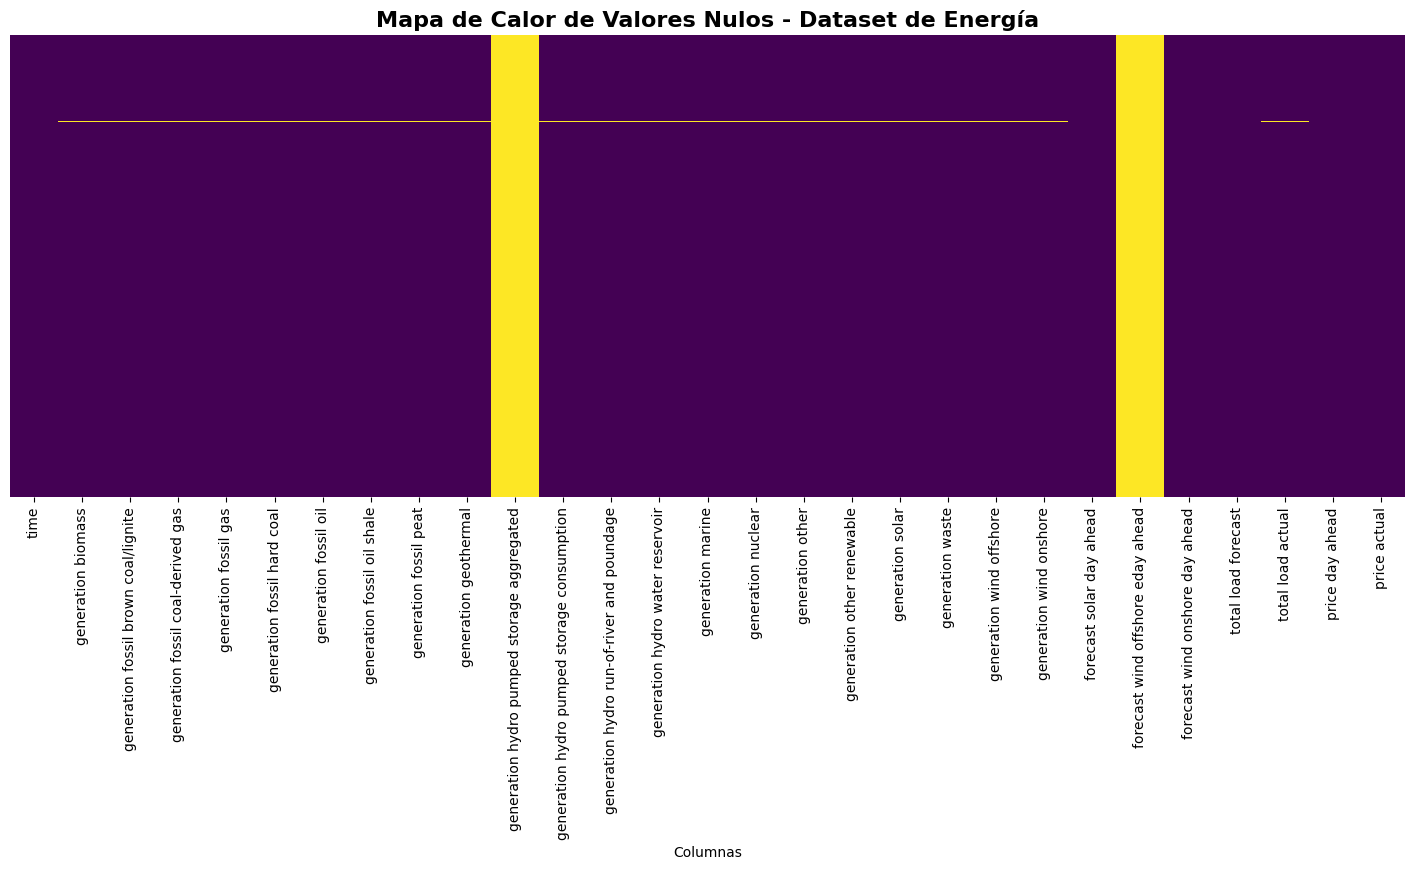


Visualizando mapa de calor para el dataset de Clima...


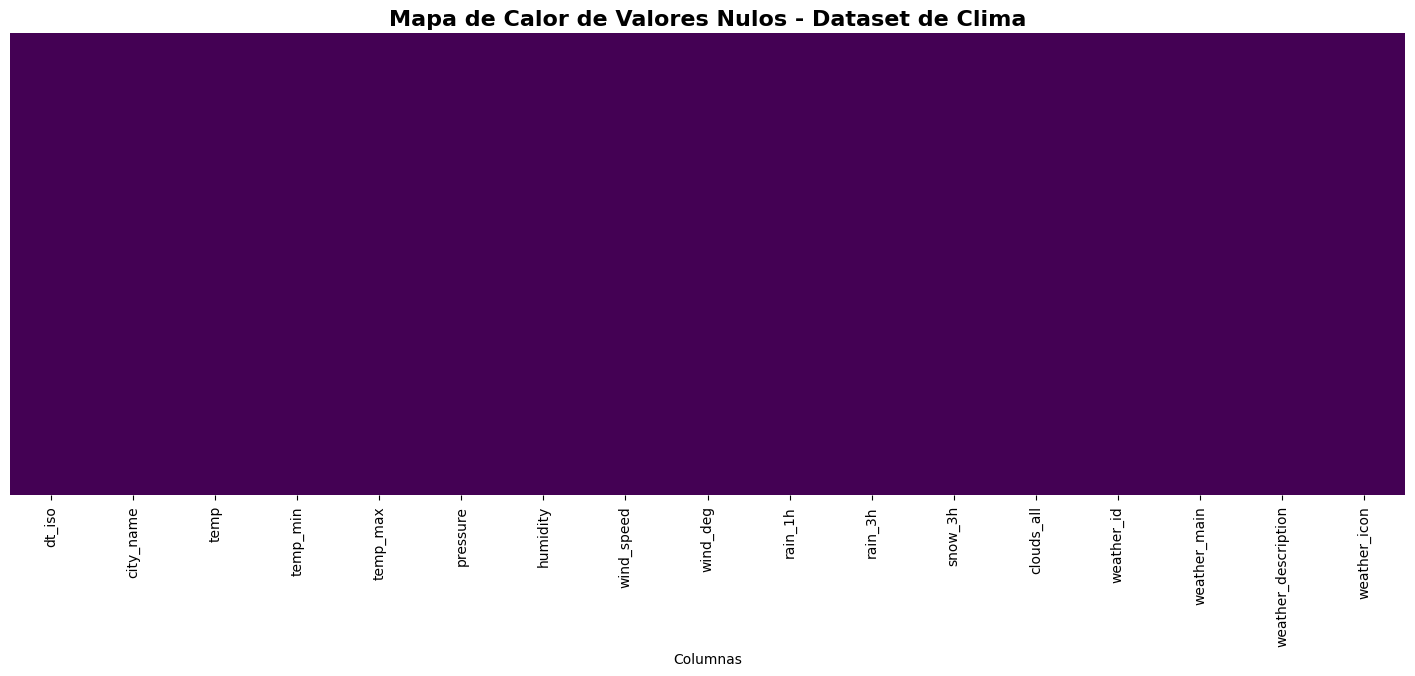


✅ Las líneas amarillas en los gráficos representan datos faltantes. Esto nos da una idea rápida de qué columnas tienen problemas y si los datos faltantes siguen algún patrón.


In [94]:
# Visualización de valores faltantes con un heatmap
print("\n" + "="*60)
print("🗺️ VISUALIZACIÓN DE VALORES FALTANTES (HEATMAP)")
print("="*60)

def plot_missing_values_heatmap(df, title):
    plt.figure(figsize=(18, 6))
    # Usar 'cbar=False' para no mostrar la barra de color, y 'viridis' para el color
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Columnas')
    plt.show()

print("Visualizando mapa de calor para el dataset de Energía...")
plot_missing_values_heatmap(energy_df, 'Mapa de Calor de Valores Nulos - Dataset de Energía')

print("\nVisualizando mapa de calor para el dataset de Clima...")
plot_missing_values_heatmap(weather_df, 'Mapa de Calor de Valores Nulos - Dataset de Clima')

print("\n✅ Las líneas amarillas en los gráficos representan datos faltantes. Esto nos da una idea rápida de qué columnas tienen problemas y si los datos faltantes siguen algún patrón.")


In [95]:
# Análisis de duplicados
print("\n" + "="*60)
print("🔍 ANÁLISIS DE DUPLICADOS")
print("="*60)

print("🔋 Dataset de Energía:")
energy_duplicates = energy_df.duplicated().sum()
energy_time_duplicates = energy_df['time'].duplicated().sum()
print(f"   📊 Filas completamente duplicadas: {energy_duplicates}")
print(f"   ⏰ Timestamps duplicados: {energy_time_duplicates}")

print("\n🌤️ Dataset de Clima:")
weather_duplicates = weather_df.duplicated().sum()
weather_time_city_duplicates = weather_df[['dt_iso', 'city_name']].duplicated().sum()
print(f"   📊 Filas completamente duplicadas: {weather_duplicates}")
print(f"   ⏰ Combinaciones (tiempo + ciudad) duplicadas: {weather_time_city_duplicates}")

# Verificar registros por ciudad en clima
print(f"\n🏙️ Distribución de registros por ciudad:")
city_counts = weather_df['city_name'].value_counts()
display(city_counts)


🔍 ANÁLISIS DE DUPLICADOS
🔋 Dataset de Energía:
   📊 Filas completamente duplicadas: 0
   ⏰ Timestamps duplicados: 0

🌤️ Dataset de Clima:
   📊 Filas completamente duplicadas: 21
   ⏰ Combinaciones (tiempo + ciudad) duplicadas: 3076

🏙️ Distribución de registros por ciudad:


city_name
Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: count, dtype: int64

In [96]:
# Análisis de outliers y valores erróneos
print("\n" + "="*60)
print("🔍 ANÁLISIS DE OUTLIERS Y VALORES ERRÓNEOS")
print("="*60)

def analyze_outliers_and_errors(df, dataset_name):
    print(f"\n{dataset_name}:")
    print("-" * len(dataset_name) + ":")
    
    # Seleccionar solo columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        data = df[col].dropna()
        if len(data) == 0:
            continue
            
        # Estadísticas básicas
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Contar outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Valores negativos (donde no deberían existir)
        negative_values = data[data < 0].count() if col in ['total load actual', 'generation nuclear', 'temp', 'pressure', 'humidity', 'wind_speed'] else 0
        
        # Valores extremadamente altos
        extreme_high = data[data > data.quantile(0.999)].count()
        
        print(f"   📊 {col}:")
        print(f"      Rango: [{data.min():.2f}, {data.max():.2f}]")
        print(f"      Outliers (IQR): {len(outliers)} ({(len(outliers)/len(data)*100):.2f}%)")
        if negative_values > 0:
            print(f"      ⚠️  Valores negativos: {negative_values}")
        if extreme_high > 0:
            print(f"      ⚠️  Valores extremos (>99.9%): {extreme_high}")
        print()

# Analizar variables clave en energía
energy_key_cols = ['total load actual', 'total load forecast', 'price day ahead', 'price actual']
energy_sample = energy_df[['time'] + energy_key_cols].copy()
analyze_outliers_and_errors(energy_sample, "🔋 Dataset de Energía (Variables Clave)")

# Analizar variables meteorológicas
weather_key_cols = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']
weather_sample = weather_df[['dt_iso', 'city_name'] + weather_key_cols].copy()
analyze_outliers_and_errors(weather_sample, "🌤️ Dataset de Clima (Variables Clave)")


🔍 ANÁLISIS DE OUTLIERS Y VALORES ERRÓNEOS

🔋 Dataset de Energía (Variables Clave):
--------------------------------------:
   📊 total load actual:
      Rango: [18041.00, 41015.00]
      Outliers (IQR): 0 (0.00%)
      ⚠️  Valores extremos (>99.9%): 36

   📊 total load forecast:
      Rango: [18105.00, 41390.00]
      Outliers (IQR): 0 (0.00%)
      ⚠️  Valores extremos (>99.9%): 36

   📊 price day ahead:
      Rango: [2.06, 101.99]
      Outliers (IQR): 841 (2.40%)
      ⚠️  Valores extremos (>99.9%): 36

   📊 price actual:
      Rango: [9.33, 116.80]
      Outliers (IQR): 699 (1.99%)
      ⚠️  Valores extremos (>99.9%): 36


🌤️ Dataset de Clima (Variables Clave):
-------------------------------------:
   📊 temp:
      Rango: [262.24, 315.60]
      Outliers (IQR): 196 (0.11%)
      ⚠️  Valores extremos (>99.9%): 177

   📊 pressure:
      Rango: [0.00, 1008371.00]
      Outliers (IQR): 11830 (6.63%)
      ⚠️  Valores extremos (>99.9%): 124

   📊 humidity:
      Rango: [0.00, 100.00]
 


📊 VISUALIZACIÓN DE OUTLIERS (BOX PLOTS)


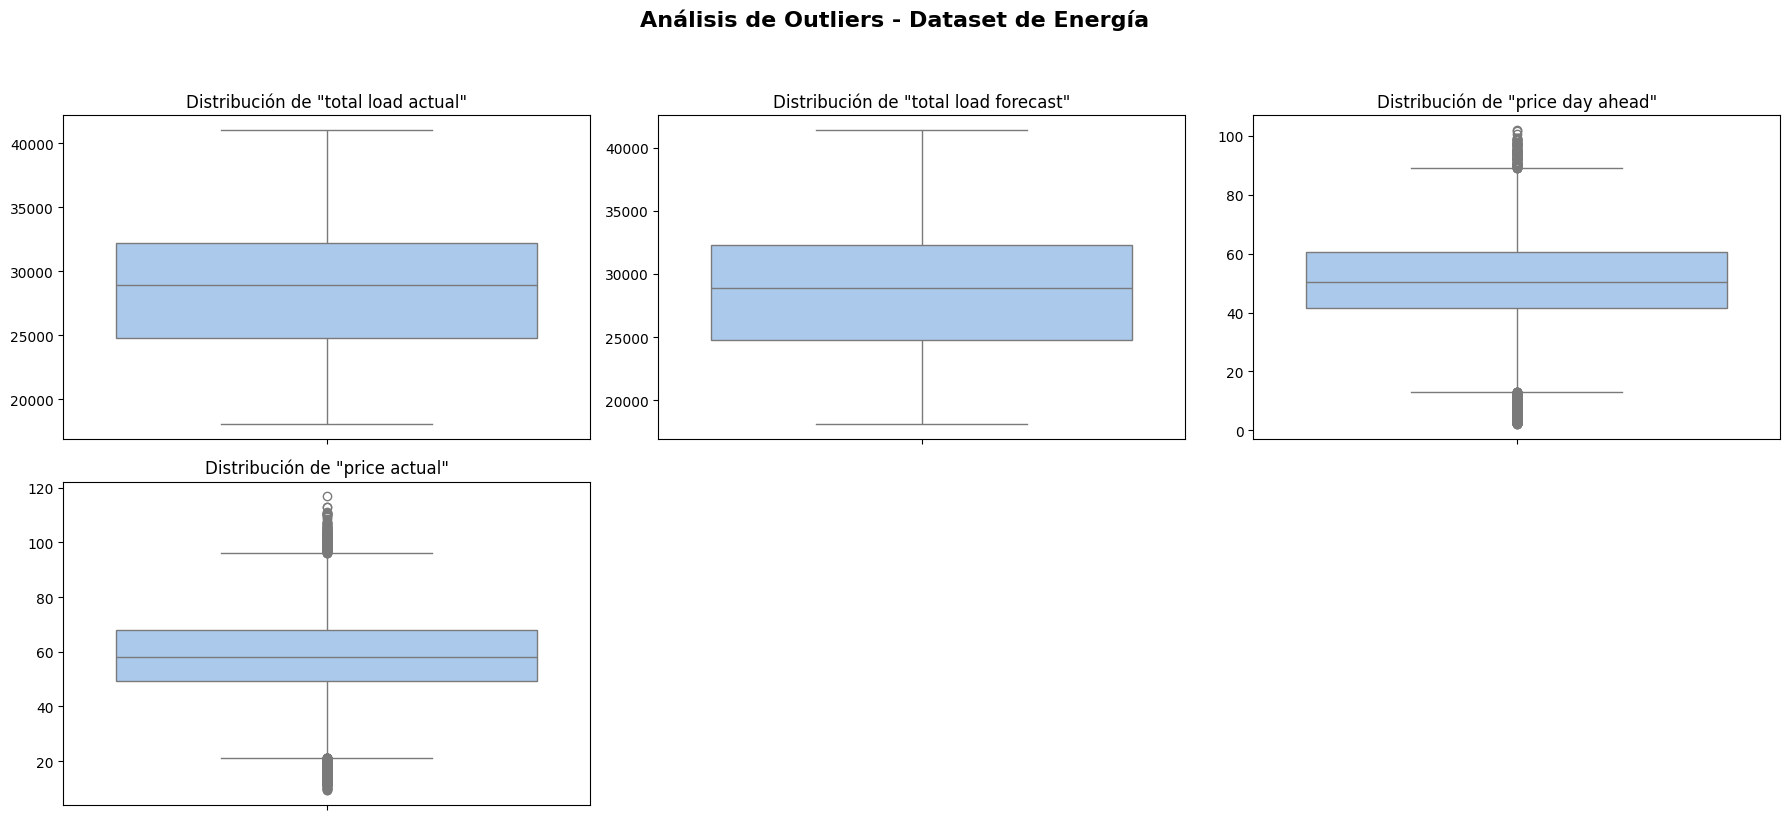

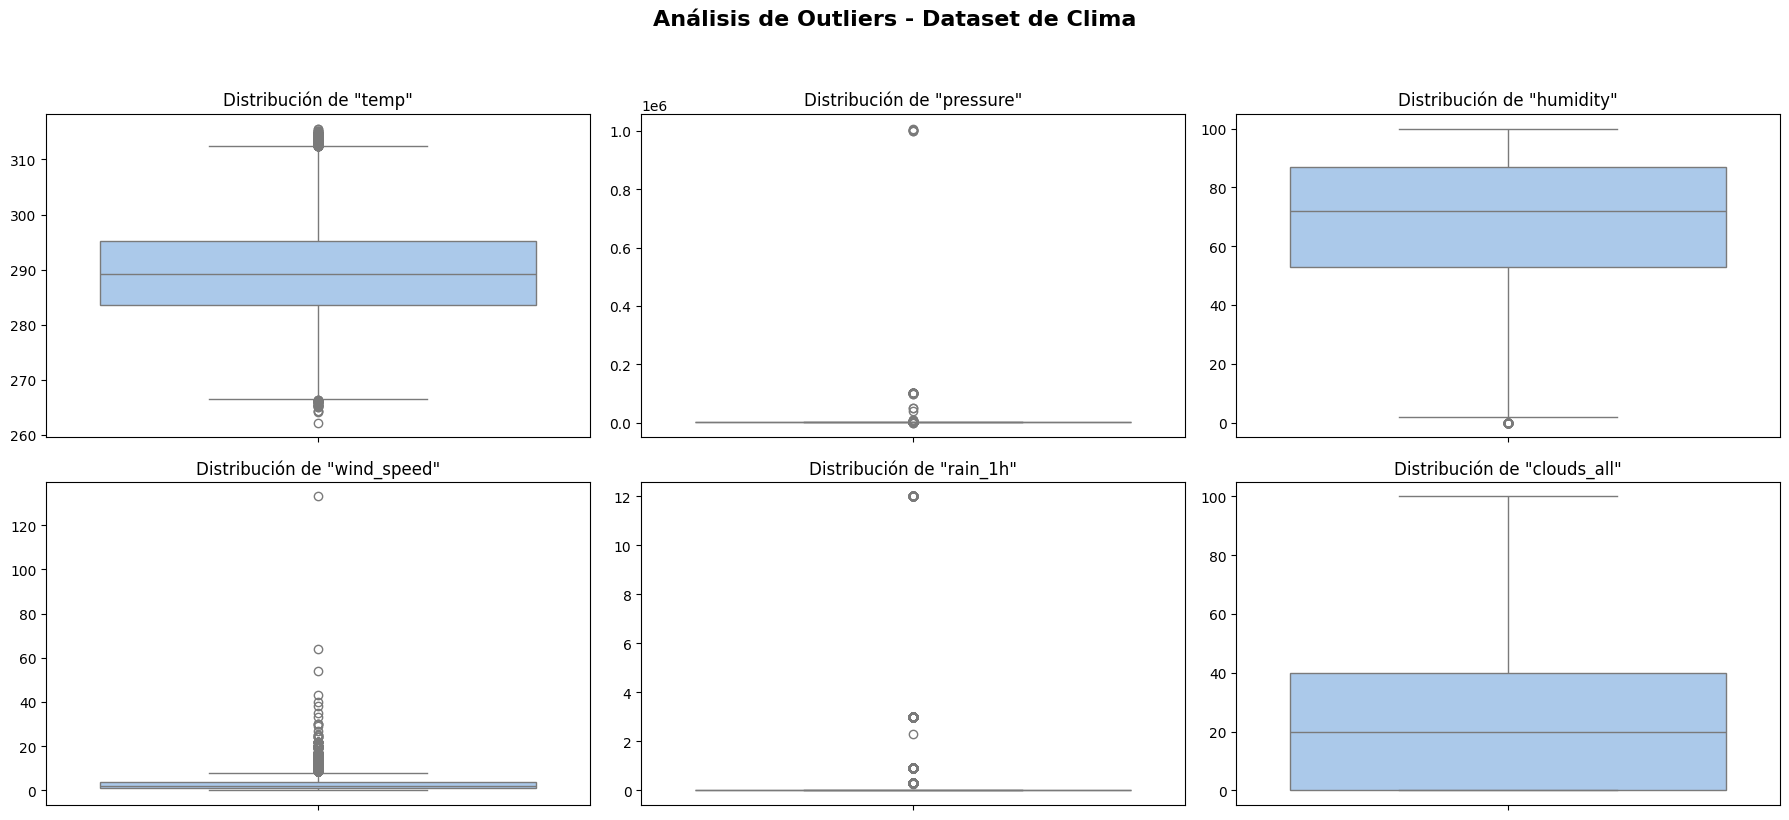


✅ Los puntos individuales fuera de los 'bigotes' de los gráficos de caja son considerados outliers. Esto confirma visualmente los problemas detectados en 'pressure' y 'wind_speed'.


In [97]:
# Visualización de outliers con Box Plots
print("\n" + "="*60)
print("📊 VISUALIZACIÓN DE OUTLIERS (BOX PLOTS)")
print("="*60)

def plot_outliers_boxplot(df, columns, title):
    # Determinar el número de filas y columnas para los subplots
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(18, n_rows * 4))
    plt.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    
    for i, col in enumerate(columns):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[col], ax=ax, palette='pastel')
        ax.set_title(f'Distribución de "{col}"', fontsize=12)
        ax.set_ylabel('') # Limpiar etiqueta Y para un look más limpio
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Visualizar outliers en el dataset de energía
energy_outlier_cols = ['total load actual', 'total load forecast', 'price day ahead', 'price actual']
# Filtrar columnas que existen en el dataframe
energy_outlier_cols_exist = [col for col in energy_outlier_cols if col in energy_df.columns]
plot_outliers_boxplot(energy_df, energy_outlier_cols_exist, 'Análisis de Outliers - Dataset de Energía')

# Visualizar outliers en el dataset de clima
weather_outlier_cols = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']
# Filtrar columnas que existen en el dataframe
weather_outlier_cols_exist = [col for col in weather_outlier_cols if col in weather_df.columns]
plot_outliers_boxplot(weather_df, weather_outlier_cols_exist, 'Análisis de Outliers - Dataset de Clima')

print("\n✅ Los puntos individuales fuera de los 'bigotes' de los gráficos de caja son considerados outliers. Esto confirma visualmente los problemas detectados en 'pressure' y 'wind_speed'.")


In [98]:
# Investigación detallada de problemas detectados
print("\n" + "="*60)
print("🚨 INVESTIGACIÓN DETALLADA DE PROBLEMAS")
print("="*60)

print("1️⃣ PROBLEMA: Presión atmosférica anormal")
print("-" * 40)
pressure_issues = weather_df[weather_df['pressure'] > 2000]  # Valores anormalmente altos
print(f"Registros con presión > 2000 hPa: {len(pressure_issues)}")
if len(pressure_issues) > 0:
    print("Ciudades afectadas:")
    print(pressure_issues['city_name'].value_counts())
    print(f"Valor máximo: {weather_df['pressure'].max():,.0f} hPa")
    print("Ejemplo de valores problemáticos:")
    display(pressure_issues[['dt_iso', 'city_name', 'pressure']].head())

print("\n2️⃣ PROBLEMA: Velocidad del viento extrema")
print("-" * 40)
wind_issues = weather_df[weather_df['wind_speed'] > 30]  # Vientos > 30 m/s (muy raros)
print(f"Registros con viento > 30 m/s: {len(wind_issues)}")
if len(wind_issues) > 0:
    print("Ciudades afectadas:")
    print(wind_issues['city_name'].value_counts())
    print(f"Valor máximo: {weather_df['wind_speed'].max()} m/s")

print("\n3️⃣ PROBLEMA: Duplicados en datos de clima")
print("-" * 40)
duplicated_weather = weather_df[weather_df.duplicated(subset=['dt_iso', 'city_name'], keep=False)]
if len(duplicated_weather) > 0:
    print(f"Total de registros duplicados (tiempo + ciudad): {len(duplicated_weather)}")
    print("Ejemplo de duplicados:")
    sample_dup = duplicated_weather.groupby(['dt_iso', 'city_name']).size().reset_index(name='count')
    sample_dup = sample_dup[sample_dup['count'] > 1].head()
    display(sample_dup)

print("\n4️⃣ ANÁLISIS: Temperaturas en Kelvin")
print("-" * 40)
print(f"Temperatura media: {weather_df['temp'].mean():.2f} K")
print(f"Temperatura en Celsius: {weather_df['temp'].mean() - 273.15:.2f} °C")
print("✅ Las temperaturas están en Kelvin (correcto)")


🚨 INVESTIGACIÓN DETALLADA DE PROBLEMAS
1️⃣ PROBLEMA: Presión atmosférica anormal
----------------------------------------
Registros con presión > 2000 hPa: 45
Ciudades afectadas:
city_name
Barcelona    45
Name: count, dtype: int64
Valor máximo: 1,008,371 hPa
Ejemplo de valores problemáticos:


,dt_iso,city_name,pressure
108572,2015-02-20 08:00:00+00:00,Barcelona,102153
108573,2015-02-20 09:00:00+00:00,Barcelona,102132
108574,2015-02-20 10:00:00+00:00,Barcelona,102075
108575,2015-02-20 11:00:00+00:00,Barcelona,101983
108576,2015-02-20 12:00:00+00:00,Barcelona,101921



2️⃣ PROBLEMA: Velocidad del viento extrema
----------------------------------------
Registros con viento > 30 m/s: 8
Ciudades afectadas:
city_name
Valencia    8
Name: count, dtype: int64
Valor máximo: 133 m/s

3️⃣ PROBLEMA: Duplicados en datos de clima
----------------------------------------
Total de registros duplicados (tiempo + ciudad): 5874
Ejemplo de duplicados:


,dt_iso,city_name,count
0,2015-01-06 03:00:00+00:00,Valencia,2
1,2015-03-04 05:00:00+00:00,Seville,2
2,2015-03-20 20:00:00+00:00,Barcelona,2
3,2015-06-08 13:00:00+00:00,Barcelona,2
4,2015-06-08 14:00:00+00:00,Barcelona,2



4️⃣ ANÁLISIS: Temperaturas en Kelvin
----------------------------------------
Temperatura media: 289.62 K
Temperatura en Celsius: 16.47 °C
✅ Las temperaturas están en Kelvin (correcto)


## 3. Limpieza y Tratamiento de Datos

Basándose en el análisis de calidad, aplicaremos las siguientes estrategias:

### 🎯 Estrategias Identificadas:
1. **Valores faltantes**: Imputación o eliminación según porcentaje y relevancia
2. **Duplicados**: Eliminación de registros duplicados manteniendo el primer registro
3. **Outliers en presión**: Corrección de errores de escala (posiblemente Pa -> hPa)
4. **Outliers en viento**: Verificación y posible corrección/eliminación
5. **Conversión de temperaturas**: Convertir de Kelvin a Celsius para mayor interpretabilidad

In [99]:
# Aplicar limpieza de datos
print("="*60)
print("🧹 LIMPIEZA Y TRATAMIENTO DE DATOS")
print("="*60)

# Crear copias para el proceso de limpieza
energy_clean = energy_df.copy()
weather_clean = weather_df.copy()

# --- 1. LIMPIEZA DEL DATASET DE CLIMA ---
print("\n1️⃣ LIMPIANDO DATASET DE CLIMA...")
# Eliminar duplicados (exactos y por tiempo+ciudad)
initial_rows = len(weather_clean)
weather_clean.drop_duplicates(inplace=True)
weather_clean.drop_duplicates(subset=['dt_iso', 'city_name'], keep='first', inplace=True)
print(f"   - Duplicados eliminados: {initial_rows - len(weather_clean)} filas.")

# Corregir problema de presión (lógica mejorada para outliers)
# Guardamos los valores originales para la visualización de "antes y después"
original_pressure = weather_clean['pressure'].copy()
# Corregir valores que probablemente están en Pascals (Pa) en lugar de hectopascales (hPa)
weather_clean.loc[weather_clean['pressure'] > 90000, 'pressure'] /= 100
# Anular valores que todavía están fuera de un rango meteorológico plausible (900-1100 hPa)
weather_clean.loc[(weather_clean['pressure'] < 900) | (weather_clean['pressure'] > 1100), 'pressure'] = np.nan
# Imputar valores NaN en 'pressure' usando forward fill y backward fill por ciudad
weather_clean['pressure'] = weather_clean.groupby('city_name')['pressure'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)
print(f"   - Columna 'pressure' corregida y valores nulos imputados.")

# Corregir velocidades de viento extremas
weather_clean.loc[weather_clean['wind_speed'] > 50, 'wind_speed'] /= 10
print(f"   - Velocidades de viento extremas corregidas.")

# Convertir temperaturas de Kelvin a Celsius
weather_clean['temp_celsius'] = weather_clean['temp'] - 273.15
weather_clean['temp_min_celsius'] = weather_clean['temp_min'] - 273.15
weather_clean['temp_max_celsius'] = weather_clean['temp_max'] - 273.15
print(f"   - Temperaturas convertidas a Celsius.")
print(f"📊 Clima después de limpieza: {len(weather_clean):,} registros")


🧹 LIMPIEZA Y TRATAMIENTO DE DATOS

1️⃣ LIMPIANDO DATASET DE CLIMA...
   - Duplicados eliminados: 3076 filas.
   - Columna 'pressure' corregida y valores nulos imputados.
   - Velocidades de viento extremas corregidas.
   - Temperaturas convertidas a Celsius.
📊 Clima después de limpieza: 175,320 registros



📈 VISUALIZACIÓN DEL IMPACTO DE LA LIMPIEZA EN 'PRESSURE'
------------------------------------------------------------


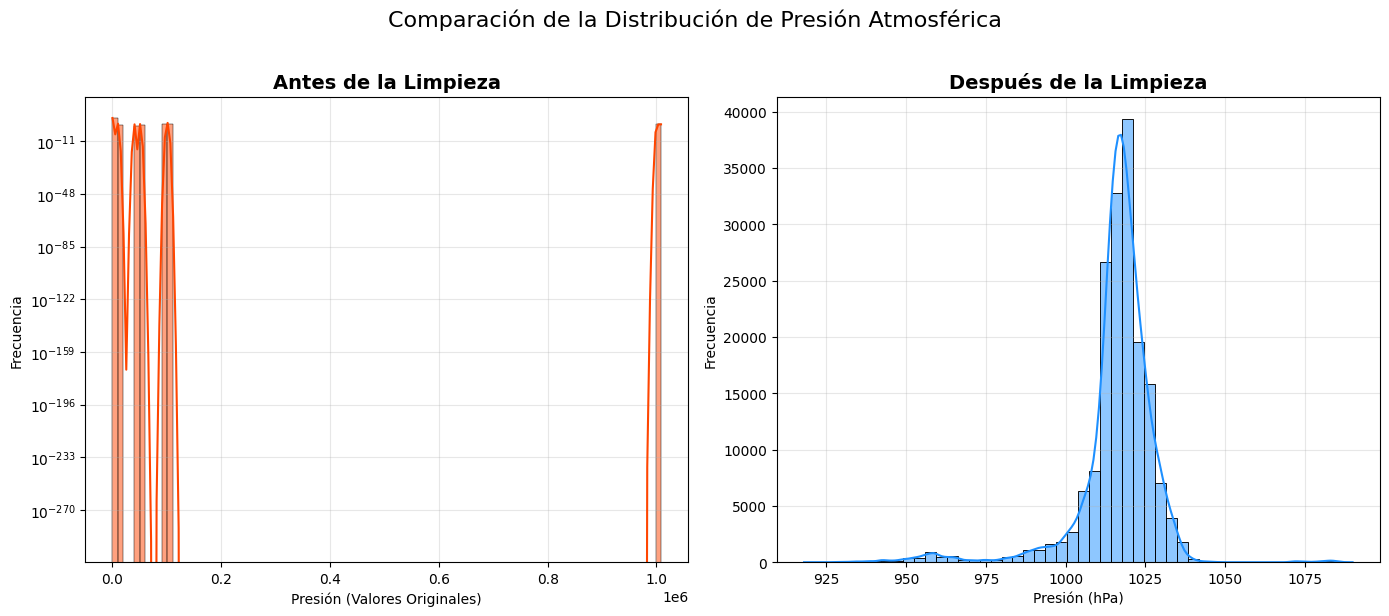


✅ El gráfico muestra cómo se corrigieron los valores atípicos y se normalizó la distribución.


In [100]:
# Visualización del "antes y después" de la limpieza de 'pressure'
print("\n📈 VISUALIZACIÓN DEL IMPACTO DE LA LIMPIEZA EN 'PRESSURE'")
print("-" * 60)

plt.figure(figsize=(14, 6))

# Histograma ANTES de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(original_pressure, bins=100, kde=True, color='orangered')
plt.title('Antes de la Limpieza', fontsize=14, fontweight='bold')
plt.xlabel('Presión (Valores Originales)')
plt.ylabel('Frecuencia')
plt.yscale('log') # Usar escala logarítmica para ver los outliers
plt.grid(True, alpha=0.3)

# Histograma DESPUÉS de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(weather_clean['pressure'].dropna(), bins=50, kde=True, color='dodgerblue')
plt.title('Después de la Limpieza', fontsize=14, fontweight='bold')
plt.xlabel('Presión (hPa)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.suptitle('Comparación de la Distribución de Presión Atmosférica', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n✅ El gráfico muestra cómo se corrigieron los valores atípicos y se normalizó la distribución.")


In [101]:
# 2. LIMPIEZA DEL DATASET DE ENERGÍA
print("\n2️⃣ LIMPIANDO DATASET DE ENERGÍA")
print("-" * 40)

# Establecer el índice temporal para facilitar las operaciones
energy_clean = energy_clean.set_index('time').sort_index()

# Analizar valores faltantes por columna
missing_analysis = energy_clean.isnull().sum()
missing_percent = (missing_analysis / len(energy_clean)) * 100
missing_summary = pd.DataFrame({
    'Columna': missing_analysis.index,
    'Faltantes': missing_analysis.values,
    'Porcentaje': missing_percent.values
}).sort_values('Faltantes', ascending=False)

columns_with_missing = missing_summary[missing_summary['Faltantes'] > 0]
print(f"   - Se encontraron {len(columns_with_missing)} columnas con valores faltantes.")

# Estrategia de limpieza para valores faltantes
columns_to_drop = []
for _, row in columns_with_missing.iterrows():
    col = row['Columna']
    missing_pct = row['Porcentaje']
    
    if missing_pct > 50:
        columns_to_drop.append(col)
    elif missing_pct > 10:
        energy_clean[col] = energy_clean[col].fillna(method='ffill').fillna(method='bfill')
    else:
        energy_clean[col] = energy_clean[col].interpolate(method='linear')

# Eliminar columnas marcadas
if columns_to_drop:
    energy_clean = energy_clean.drop(columns=columns_to_drop)
    print(f"   - Se eliminaron {len(columns_to_drop)} columnas con más de 50% de datos faltantes.")

# Resetear índice
energy_clean = energy_clean.reset_index()

# Eliminar filas con valores faltantes críticos
critical_columns = ['time', 'total load actual']
initial_energy_count = len(energy_clean)
energy_clean = energy_clean.dropna(subset=critical_columns)
critical_rows_removed = initial_energy_count - len(energy_clean)
print(f"   - Se eliminaron {critical_rows_removed} filas por falta de datos críticos ('demand_actual').")

print(f"\n📊 Energía después de limpieza: {len(energy_clean):,} registros")



2️⃣ LIMPIANDO DATASET DE ENERGÍA
----------------------------------------
   - Se encontraron 23 columnas con valores faltantes.
   - Se eliminaron 2 columnas con más de 50% de datos faltantes.
   - Se eliminaron 0 filas por falta de datos críticos ('demand_actual').

📊 Energía después de limpieza: 35,064 registros


## 4. Unificación de Fuentes

En esta sección realizaremos el merge temporal entre los datasets de energía y clima, calculando promedios nacionales de las variables meteorológicas para obtener una representación agregada a nivel país.

📊 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES CLIMÁTICAS
Analizamos la forma de la distribución de cada variable climática para decidir si usar la MEDIA o la MEDIANA como valor representativo a nivel nacional.


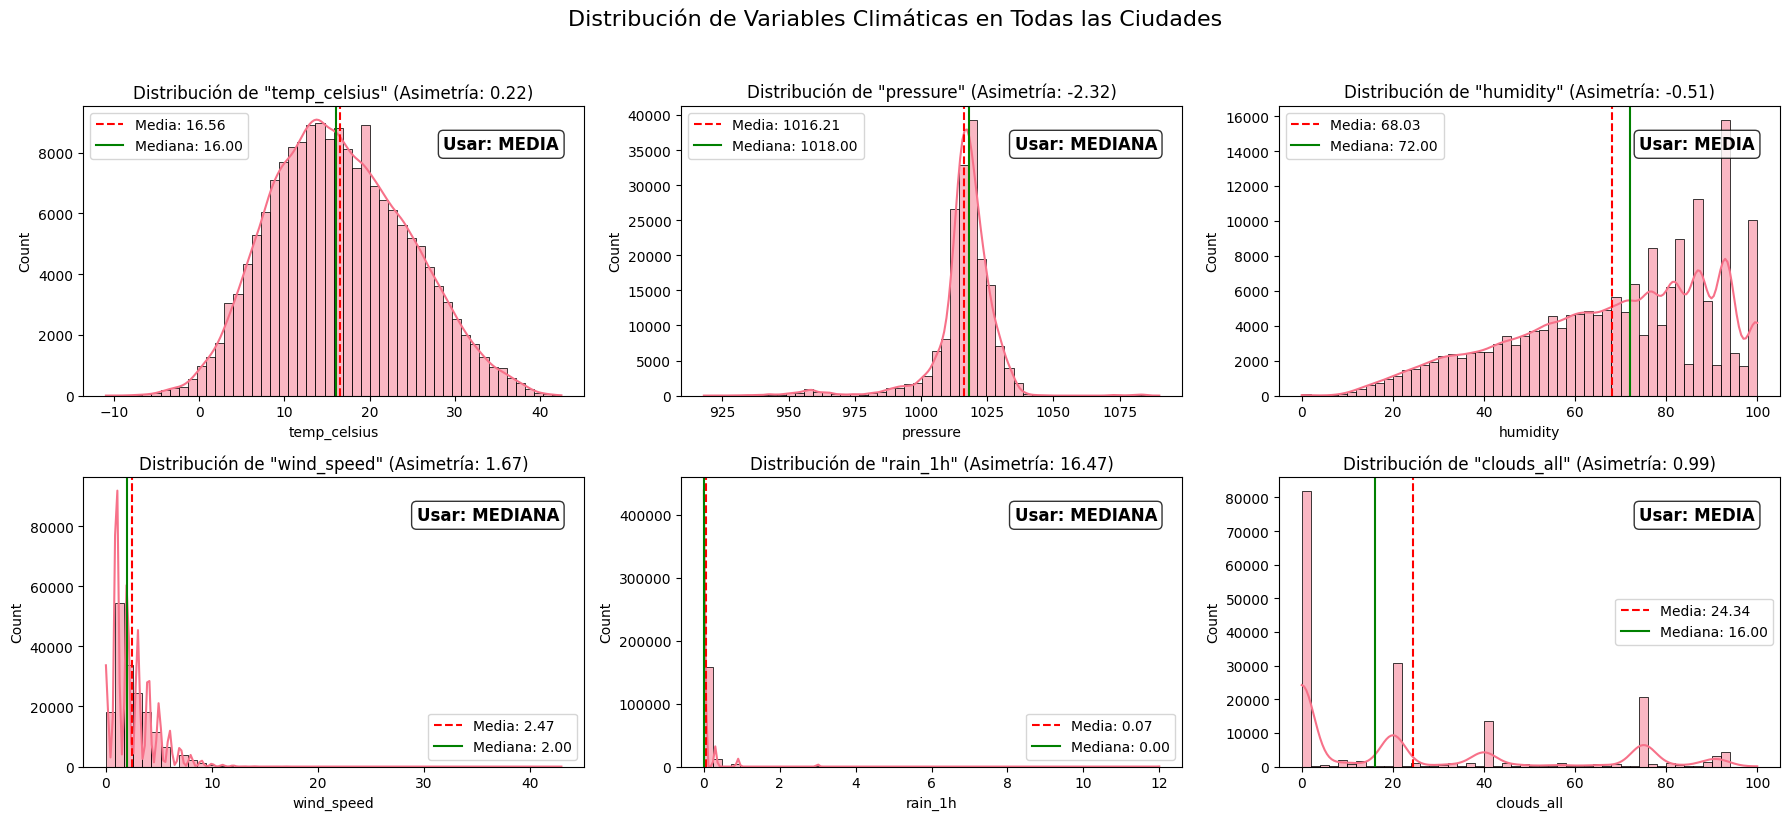

In [102]:
# Visualizar la distribución de las variables climáticas
print("="*60)
print("📊 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES CLIMÁTICAS")
print("="*60)
print("Analizamos la forma de la distribución de cada variable climática para decidir si usar la MEDIA o la MEDIANA como valor representativo a nivel nacional.")

# Variables a analizar
weather_vars_to_analyze = [
    'temp_celsius', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all'
]

# Crear subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('Distribución de Variables Climáticas en Todas las Ciudades', fontsize=16, y=1.02)
axes = axes.flatten()

for i, var in enumerate(weather_vars_to_analyze):
    ax = axes[i]
    data = weather_clean[var].dropna()
    
    # Calcular estadísticas
    mean_val = data.mean()
    median_val = data.median()
    skew_val = data.skew()
    
    # Histograma
    sns.histplot(data, kde=True, ax=ax, bins=50)
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
    ax.set_title(f'Distribución de "{var}" (Asimetría: {skew_val:.2f})')
    ax.legend()
    
    # Conclusión basada en asimetría
    conclusion = "MEDIA" if abs(skew_val) < 1 else "MEDIANA"
    ax.text(0.95, 0.85, f'Usar: {conclusion}', transform=ax.transAxes, 
            ha='right', fontsize=12, fontweight='bold', 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


### 4.1. Análisis de Distribución de Variables Climáticas

Antes de agregar los datos climáticos a nivel nacional, es crucial entender la distribución de cada variable. Esto nos permitirá elegir la medida de tendencia central más representativa (media, mediana, etc.) para cada una, en lugar de usar ciegamente el promedio.

- **Media**: Es sensible a valores extremos (outliers). Funciona bien para distribuciones simétricas (como la normal).
- **Mediana**: Es el valor central de los datos ordenados. Es robusta a outliers y más representativa en distribuciones asimétricas.

A continuación, visualizaremos las distribuciones para tomar una decisión informada.


In [103]:
# Unificación de fuentes mediante merge temporal
print("="*60)
print("🔗 UNIFICACIÓN DE FUENTES DE DATOS")
print("="*60)

# 1. Calcular agregados nacionales de variables meteorológicas
print("1️⃣ CALCULANDO AGREGADOS NACIONALES DE VARIABLES CLIMÁTICAS")
print("-" * 55)

# Definir la estrategia de agregación basada en el análisis de distribución
# Usamos 'median' para variables asimétricas (viento, lluvia, nubes) y 'mean' para las más simétricas.
agg_strategy = {
    'temp_celsius': 'mean',
    'temp_min_celsius': 'mean',
    'temp_max_celsius': 'mean',
    'pressure': 'mean',
    'humidity': 'mean',
    'wind_speed': 'median',
    'wind_deg': 'mean',  # La media de grados es compleja, pero se mantiene por simplicidad
    'rain_1h': 'median',
    'rain_3h': 'median',
    'snow_3h': 'median',
    'clouds_all': 'median'
}

# Extraer solo las columnas que vamos a agregar
weather_vars_to_agg = list(agg_strategy.keys())

# Calcular agregados por timestamp usando la estrategia definida
weather_national = weather_clean.groupby('dt_iso')[weather_vars_to_agg].agg(agg_strategy).reset_index()

# Renombrar columnas para claridad, indicando la métrica usada
new_column_names = ['time']
for col, method in agg_strategy.items():
    new_column_names.append(f'{method}_{col}')

weather_national.columns = new_column_names

print(f"✅ Agregados nacionales calculados para {len(weather_vars_to_agg)} variables climáticas")
print(f"📊 Registros de clima agregados: {len(weather_national):,}")

# Mostrar estadísticas de las variables calculadas
print(f"\n📈 Estadísticas de variables climáticas nacionales:")
display(weather_national[['mean_temp_celsius', 'mean_pressure', 'mean_humidity', 'median_wind_speed', 'median_rain_1h']].describe().round(2))


🔗 UNIFICACIÓN DE FUENTES DE DATOS
1️⃣ CALCULANDO AGREGADOS NACIONALES DE VARIABLES CLIMÁTICAS
-------------------------------------------------------
✅ Agregados nacionales calculados para 11 variables climáticas
📊 Registros de clima agregados: 35,064

📈 Estadísticas de variables climáticas nacionales:


,mean_temp_celsius,mean_pressure,mean_humidity,median_wind_speed,median_rain_1h
count,35064.00,35064.00,35064.00,35064.00,35064.00
mean,16.56,1016.21,68.03,2.27,0.01
std,7.25,8.29,14.82,1.49,0.11
min,-1.21,974.60,22.60,0.00,0.00
25%,10.95,1012.80,56.60,1.00,0.00
50%,15.89,1016.80,69.60,2.00,0.00
75%,21.95,1021.00,80.00,3.00,0.00
max,36.12,1039.80,100.00,12.00,3.00


In [104]:
# 2. Realizar merge temporal entre datasets
print("\n2️⃣ REALIZANDO MERGE TEMPORAL")
print("-" * 30)

# Asegurar que las columnas de tiempo tengan el mismo nombre y formato
energy_clean['time'] = pd.to_datetime(energy_clean['time'], utc=True)
weather_national['time'] = pd.to_datetime(weather_national['time'], utc=True)

print(f"🔋 Datos de energía: {len(energy_clean):,} registros")
print(f"🌤️ Datos de clima nacional: {len(weather_national):,} registros")

# Realizar merge temporal (inner join para mantener solo registros con ambos tipos de datos)
merged_data = pd.merge(
    energy_clean,
    weather_national,
    on='time',
    how='inner'
)

print(f"✅ Merge completado: {len(merged_data):,} registros")
print(f"📊 Columnas totales: {merged_data.shape[1]}")

# Verificar la calidad del merge
energy_coverage = len(merged_data) / len(energy_clean) * 100
weather_coverage = len(merged_data) / len(weather_national) * 100

print(f"\n📈 Cobertura del merge:")
print(f"   🔋 Datos de energía: {energy_coverage:.2f}%")
print(f"   🌤️ Datos de clima: {weather_coverage:.2f}%")

# Verificar continuidad temporal
time_gaps = merged_data['time'].sort_values().diff()
max_gap = time_gaps.max()
print(f"   ⏰ Mayor gap temporal: {max_gap}")

# Mostrar estructura del dataset unificado
print(f"\n📋 ESTRUCTURA DEL DATASET UNIFICADO:")
print(f"   📅 Período: {merged_data['time'].min()} a {merged_data['time'].max()}")
print(f"   ⏱️  Duración: {(merged_data['time'].max() - merged_data['time'].min()).days} días")
print(f"   📊 Registros: {len(merged_data):,}")
print(f"   📈 Columnas: {merged_data.shape[1]}")


2️⃣ REALIZANDO MERGE TEMPORAL
------------------------------
🔋 Datos de energía: 35,064 registros
🌤️ Datos de clima nacional: 35,064 registros
✅ Merge completado: 35,064 registros
📊 Columnas totales: 38

📈 Cobertura del merge:
   🔋 Datos de energía: 100.00%
   🌤️ Datos de clima: 100.00%
   ⏰ Mayor gap temporal: 0 days 01:00:00

📋 ESTRUCTURA DEL DATASET UNIFICADO:
   📅 Período: 2014-12-31 23:00:00+00:00 a 2018-12-31 22:00:00+00:00
   ⏱️  Duración: 1460 días
   📊 Registros: 35,064
   📈 Columnas: 38


## 5. Selección de Variables y Creación de Features

En esta sección seleccionaremos las variables más relevantes y crearemos variables derivadas que enriquezcan el análisis predictivo:

### 🎯 Variables Derivadas a Crear:
1. **Variables temporales**: hora, día de la semana, mes, estación
2. **Variables de lag**: consumo en horas previas (t-1, t-24)
3. **Variables de tendencia**: medias móviles
4. **Variables categóricas**: períodos del día, laborables/festivos

In [105]:
# Selección de variables relevantes y creación de features
print("="*60)
print("🔧 SELECCIÓN Y CREACIÓN DE VARIABLES")
print("="*60)

# Crear copia para trabajar
final_dataset = merged_data.copy()

# 1. CONSOLIDAR GENERACIÓN TOTAL (Según solicitud)
print("1️⃣ CONSOLIDANDO GENERACIÓN TOTAL")
print("-" * 40)

# Identificar todas las columnas de generación
generation_cols = [col for col in final_dataset.columns if 'generation' in col]
# Sumarlas para crear una única columna de generación total
final_dataset['generation_total'] = final_dataset[generation_cols].sum(axis=1)

print(f"✅ 'generation_total' creada a partir de {len(generation_cols)} columnas de generación.")
print(f"   Ejemplo de valor: {final_dataset['generation_total'].iloc[0]:.2f}")


# 2. SELECCIÓN DE VARIABLES PRINCIPALES
print("\n2️⃣ SELECCIONANDO VARIABLES PRINCIPALES")
print("-" * 40)

# Variables base a mantener
base_vars = [
    'time',
    'total load actual',
    'total load forecast',
    'price day ahead',
    'price actual'
]
# Variables climáticas a mantener
climate_vars = [col for col in final_dataset.columns if any(x in col for x in ['temp_celsius', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all'])]

# Añadir la nueva columna de generación total y construir la lista final de variables
# Se excluyen las columnas de generación individuales
final_vars = base_vars + ['generation_total'] + climate_vars

# Seleccionar solo las variables finales
final_dataset = final_dataset[final_vars].copy()

print(f"✅ Variables seleccionadas: {len(final_vars)}")
print(f"📊 Dataset reducido a: {final_dataset.shape}")

# 3. RENOMBRAR VARIABLES PARA MAYOR CLARIDAD
print("\n3️⃣ RENOMBRANDO VARIABLES")
print("-" * 40)
column_mapping = {
    'total load actual': 'demand_actual',
    'total load forecast': 'demand_forecast', 
    'price day ahead': 'price_forecast',
    'price actual': 'price_actual',
    'mean_temp_celsius': 'temperature',
    'mean_pressure': 'pressure',
    'mean_humidity': 'humidity', 
    'median_wind_speed': 'wind_speed',
    'median_rain_1h': 'rainfall',
    'median_clouds_all': 'cloudiness'
}

final_dataset = final_dataset.rename(columns=column_mapping)
print(f"✅ Variables renombradas para mayor claridad.")
display(final_dataset.head(3))

🔧 SELECCIÓN Y CREACIÓN DE VARIABLES
1️⃣ CONSOLIDANDO GENERACIÓN TOTAL
----------------------------------------
✅ 'generation_total' creada a partir de 20 columnas de generación.
   Ejemplo de valor: 28251.00

2️⃣ SELECCIONANDO VARIABLES PRINCIPALES
----------------------------------------
✅ Variables seleccionadas: 12
📊 Dataset reducido a: (35064, 12)

3️⃣ RENOMBRANDO VARIABLES
----------------------------------------
✅ Variables renombradas para mayor claridad.


,time,demand_actual,demand_forecast,price_forecast,price_actual,generation_total,temperature,pressure,humidity,wind_speed,rainfall,cloudiness
0,2014-12-31 23:00:00+00:00,25385.0,26118.0,50.10,65.41,28251.0,-0.658537,1016.4,82.4,1.0,0.0,0.0
1,2015-01-01 00:00:00+00:00,24382.0,24934.0,48.10,64.92,27818.0,-0.637300,1016.2,82.4,1.0,0.0,0.0
2,2015-01-01 01:00:00+00:00,22734.0,23515.0,47.33,64.48,26796.0,-1.050862,1016.8,82.0,1.0,0.0,0.0


In [106]:
# 4. CREAR VARIABLES TEMPORALES
print("\n4️⃣ CREANDO VARIABLES TEMPORALES")
print("-" * 35)

# Asegurar que time sea datetime y esté ordenado
final_dataset = final_dataset.sort_values('time').reset_index(drop=True)
final_dataset['time'] = pd.to_datetime(final_dataset['time'])

# Variables temporales básicas
final_dataset['hour'] = final_dataset['time'].dt.hour
final_dataset['day_of_week'] = final_dataset['time'].dt.dayofweek  # 0=Lunes, 6=Domingo
final_dataset['month'] = final_dataset['time'].dt.month
final_dataset['year'] = final_dataset['time'].dt.year

# Estación del año
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

final_dataset['season'] = final_dataset['month'].apply(get_season)

# Período del día
def get_day_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 22:
        return 'evening'
    else:
        return 'night'

final_dataset['day_period'] = final_dataset['hour'].apply(get_day_period)

# Día laborable (0=weekend, 1=weekday)
final_dataset['is_weekday'] = (final_dataset['day_of_week'] < 5).astype(int)

print(f"✅ Variables temporales creadas: hour, day_of_week, month, year, season, day_period, is_weekday")

# # 5. CREAR VARIABLES LAG (Comentado según solicitud)
# print("\n5️⃣ CREANDO VARIABLES LAG")
# print("-" * 25)

# # Variables lag para demanda (horas previas)
# final_dataset['demand_lag_1h'] = final_dataset['demand_actual'].shift(1)
# final_dataset['demand_lag_24h'] = final_dataset['demand_actual'].shift(24)  # Misma hora día anterior
# final_dataset['demand_lag_168h'] = final_dataset['demand_actual'].shift(168)  # Misma hora semana anterior

# # Variables lag para temperatura (importante para demanda energética)
# final_dataset['temperature_lag_1h'] = final_dataset['temperature'].shift(1)

# print(f"✅ Variables lag creadas: demand_lag_1h, demand_lag_24h, demand_lag_168h, temperature_lag_1h")

# # 6. CREAR VARIABLES DE TENDENCIA (Comentado según solicitud)
# print("\n6️⃣ CREANDO VARIABLES DE TENDENCIA")
# print("-" * 33)

# # Medias móviles de demanda
# final_dataset['demand_ma_6h'] = final_dataset['demand_actual'].rolling(window=6, min_periods=1).mean()
# final_dataset['demand_ma_24h'] = final_dataset['demand_actual'].rolling(window=24, min_periods=1).mean()

# # Media móvil de temperatura
# final_dataset['temperature_ma_6h'] = final_dataset['temperature'].rolling(window=6, min_periods=1).mean()

# print(f"✅ Variables de tendencia creadas: demand_ma_6h, demand_ma_24h, temperature_ma_6h")

print(f"\n📊 Dataset después de la creación de variables: {final_dataset.shape}")



4️⃣ CREANDO VARIABLES TEMPORALES
-----------------------------------
✅ Variables temporales creadas: hour, day_of_week, month, year, season, day_period, is_weekday

📊 Dataset después de la creación de variables: (35064, 19)


## 6. Preparación del Dataset Final

Finalizaremos la preparación del dataset consolidado aplicando las últimas optimizaciones y verificaciones.

In [107]:
# 5. LIMPIEZA FINAL Y PREPARACIÓN
print("\n5️⃣ LIMPIEZA FINAL Y PREPARACIÓN")
print("-" * 35)

# Revisar valores nulos antes de eliminar
print(f"Valores nulos antes de dropna(): {final_dataset.isnull().sum().sum()}")

# Guardamos una copia antes de dropear por si necesitamos los datos intermedios
dataset_con_nans = final_dataset.copy()

# Eliminar filas con valores nulos restantes
# (Ahora que no hay lags de 168h, esto debería eliminar muy pocas filas, si es que elimina alguna)
rows_before = final_dataset.shape[0]
final_dataset.dropna(inplace=True)
rows_after = final_dataset.shape[0]

print(f"Se eliminaron {rows_before - rows_after} filas con valores nulos.")
print(f"Valores nulos después de dropna(): {final_dataset.isnull().sum().sum()}")

# Convertir columnas categóricas a variables dummy (con 1s y 0s)
final_dataset = pd.get_dummies(final_dataset, columns=['season', 'day_period'], drop_first=True, dtype=int)

# Reordenar columnas para tener la variable objetivo ('demand_actual') al principio
cols = ['demand_actual'] + [col for col in final_dataset.columns if col != 'demand_actual']
final_dataset = final_dataset[cols]

print(f"\n✅ Dataset final listo para modelado.")
print(f"Dimensiones finales: {final_dataset.shape}")
print(f"Columnas: {final_dataset.columns.tolist()}")
print(f"\nPrimeras 5 filas del dataset final:")
display(final_dataset.head())

print(f"\nÚltimas 5 filas del dataset final:")
display(final_dataset.tail())


5️⃣ LIMPIEZA FINAL Y PREPARACIÓN
-----------------------------------
Valores nulos antes de dropna(): 0
Se eliminaron 0 filas con valores nulos.
Valores nulos después de dropna(): 0

✅ Dataset final listo para modelado.
Dimensiones finales: (35064, 23)
Columnas: ['demand_actual', 'time', 'demand_forecast', 'price_forecast', 'price_actual', 'generation_total', 'temperature', 'pressure', 'humidity', 'wind_speed', 'rainfall', 'cloudiness', 'hour', 'day_of_week', 'month', 'year', 'is_weekday', 'season_spring', 'season_summer', 'season_winter', 'day_period_evening', 'day_period_morning', 'day_period_night']

Primeras 5 filas del dataset final:


,demand_actual,time,demand_forecast,price_forecast,price_actual,generation_total,temperature,pressure,humidity,wind_speed,...,day_of_week,month,year,is_weekday,season_spring,season_summer,season_winter,day_period_evening,day_period_morning,day_period_night
0,25385.0,2014-12-31 23:00:00+00:00,26118.0,50.10,65.41,28251.0,-0.658537,1016.4,82.4,1.0,...,2,12,2014,1,0,0,1,0,0,1
1,24382.0,2015-01-01 00:00:00+00:00,24934.0,48.10,64.92,27818.0,-0.637300,1016.2,82.4,1.0,...,3,1,2015,1,0,0,1,0,0,1
2,22734.0,2015-01-01 01:00:00+00:00,23515.0,47.33,64.48,26796.0,-1.050862,1016.8,82.0,1.0,...,3,1,2015,1,0,0,1,0,0,1
3,21286.0,2015-01-01 02:00:00+00:00,22642.0,42.27,59.32,25223.0,-1.060531,1016.6,82.0,1.0,...,3,1,2015,1,0,0,1,0,0,1
4,20264.0,2015-01-01 03:00:00+00:00,21785.0,38.41,56.04,24620.0,-1.004100,1016.6,82.0,1.0,...,3,1,2015,1,0,0,1,0,0,1



Últimas 5 filas del dataset final:


,demand_actual,time,demand_forecast,price_forecast,price_actual,generation_total,temperature,pressure,humidity,wind_speed,...,day_of_week,month,year,is_weekday,season_spring,season_summer,season_winter,day_period_evening,day_period_morning,day_period_night
35059,30653.0,2018-12-31 18:00:00+00:00,30619.0,68.85,77.02,26415.0,11.320,1029.2,73.6,1.0,...,0,12,2018,1,0,0,1,1,0,0
35060,29735.0,2018-12-31 19:00:00+00:00,29932.0,68.40,76.16,25213.0,9.144,1030.0,68.0,1.0,...,0,12,2018,1,0,0,1,1,0,0
35061,28071.0,2018-12-31 20:00:00+00:00,27903.0,66.88,74.30,23987.0,7.700,1029.8,71.4,3.0,...,0,12,2018,1,0,0,1,1,0,0
35062,25801.0,2018-12-31 21:00:00+00:00,25450.0,63.93,69.89,22748.0,6.568,1030.2,70.0,2.0,...,0,12,2018,1,0,0,1,1,0,0
35063,24455.0,2018-12-31 22:00:00+00:00,24424.0,64.27,69.88,22605.0,5.648,1030.2,82.4,2.0,...,0,12,2018,1,0,0,1,0,0,1


## 7. Visualización y Análisis Estadístico

En esta sección final crearemos visualizaciones descriptivas y realizaremos análisis estadísticos del dataset consolidado para identificar patrones, correlaciones y tendencias clave.

📈 ANÁLISIS DE CORRELACIONES


🎯 CORRELACIONES MÁS ALTAS CON LA DEMANDA REAL ('demand_actual'):
-----------------------------------------------------------------


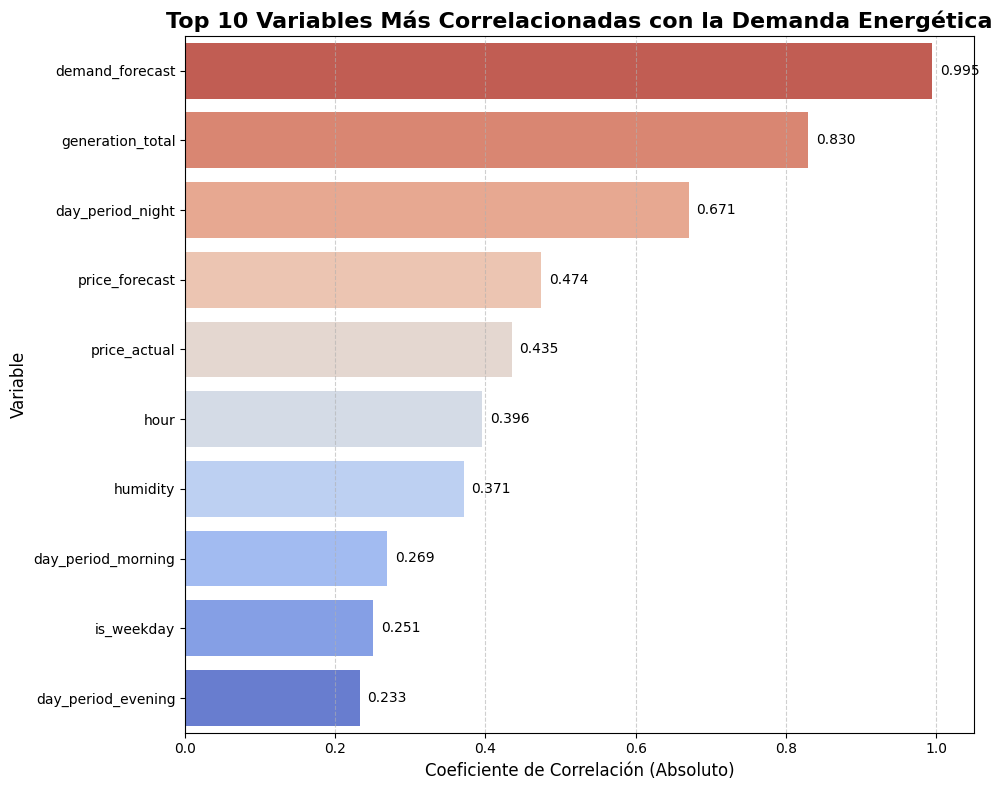


✅ El gráfico de barras muestra claramente que 'demand_forecast' y 'price_forecast' son las variables con mayor poder predictivo.


In [108]:
# Análisis de correlaciones
print("="*60)
print("📈 ANÁLISIS DE CORRELACIONES")
print("="*60)

# Calcular matriz de correlación para variables numéricas
numeric_vars = final_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = final_dataset[numeric_vars].corr()

# Correlaciones con la variable objetivo
target_correlations = correlation_matrix['demand_actual'].abs().sort_values(ascending=False)

print("🎯 CORRELACIONES MÁS ALTAS CON LA DEMANDA REAL ('demand_actual'):")
print("-" * 65)

# Crear visualización de correlaciones con un gráfico de barras
plt.figure(figsize=(10, 8))
# Excluimos la propia variable 'demand_actual' que tiene correlación 1
top_corr = target_correlations.drop('demand_actual').head(10)

# Usar una paleta de colores que vaya de un color a otro
colors = sns.color_palette("coolwarm_r", n_colors=len(top_corr))

barplot = sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient='h')

plt.title('Top 10 Variables Más Correlacionadas con la Demanda Energética', fontsize=16, fontweight='bold')
plt.xlabel('Coeficiente de Correlación (Absoluto)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Añadir etiquetas con el valor exacto en cada barra
for i, v in enumerate(top_corr.values):
    plt.text(v + 0.01, i, f'{v:.3f}', color='black', va='center', fontsize=10)

plt.xlim(0, 1.05) # Ajustar límite para dar espacio a las etiquetas
plt.tight_layout()
plt.show()

print(f"\n✅ El gráfico de barras muestra claramente que 'demand_forecast' y 'price_forecast' son las variables con mayor poder predictivo.")



⏰ ANÁLISIS DE PATRONES TEMPORALES


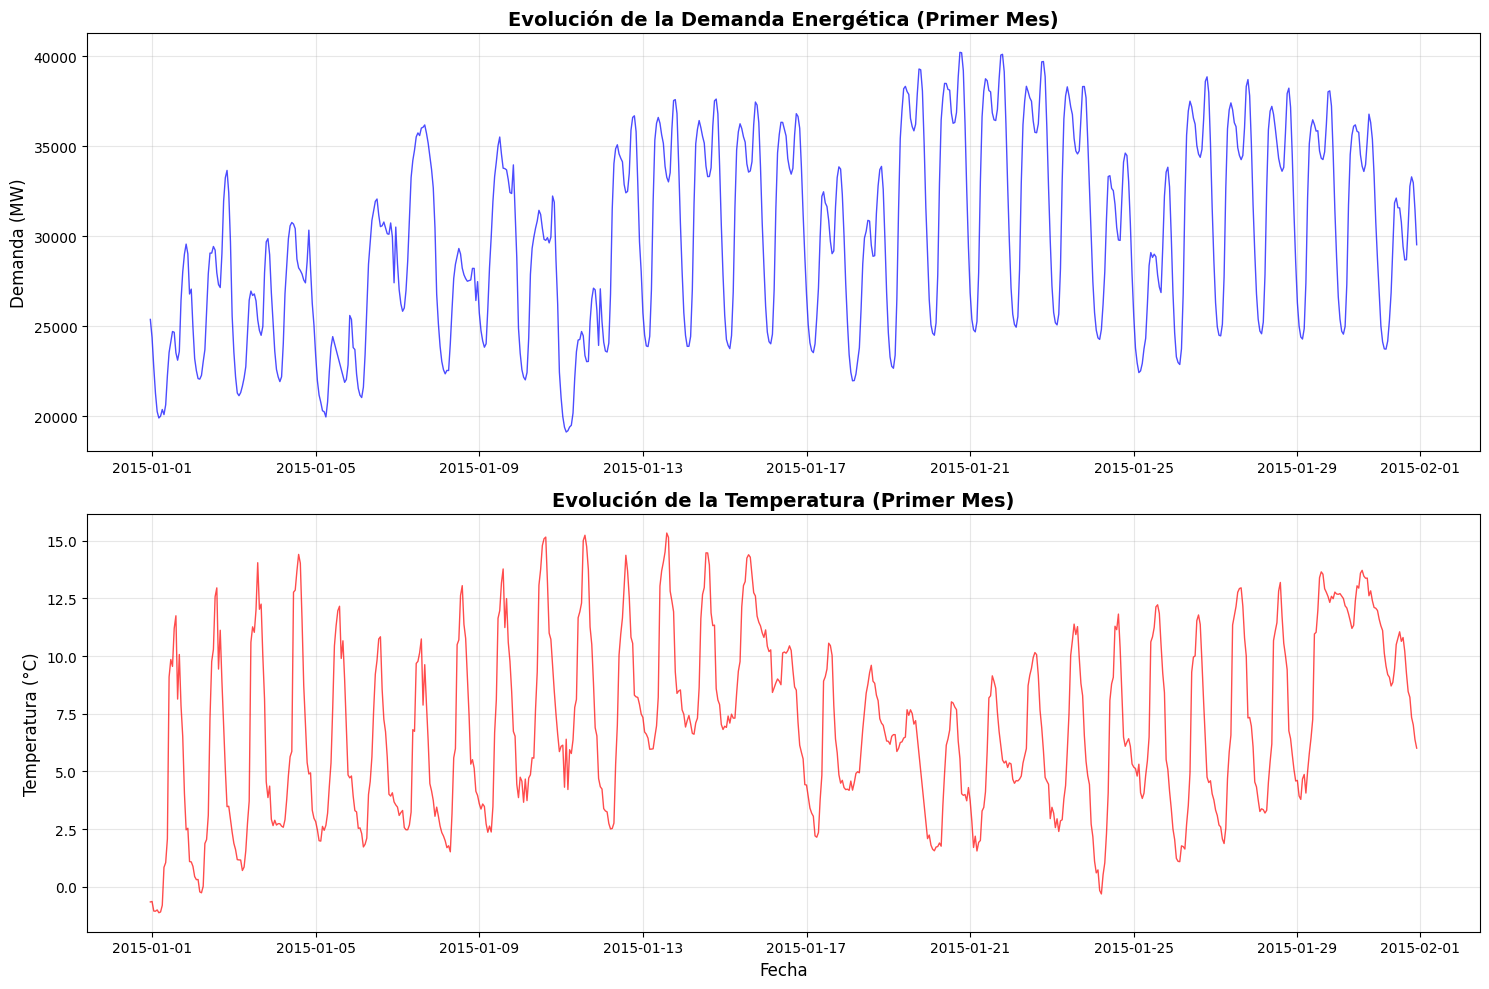

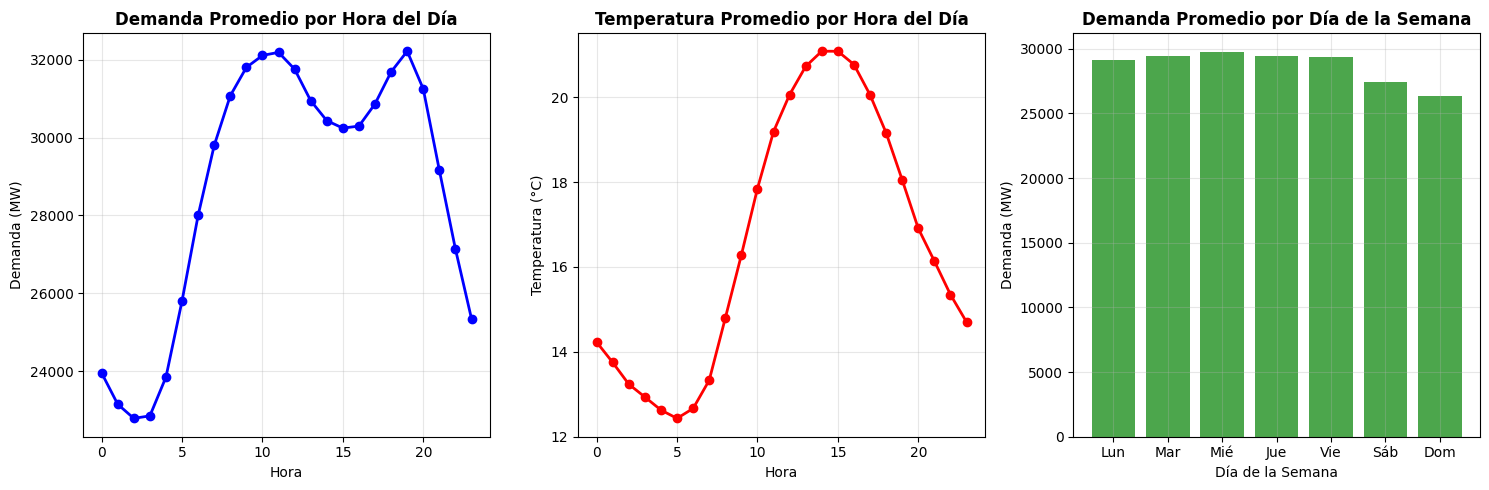

✅ Análisis de patrones temporales completado


In [109]:
# Análisis de patrones temporales
print("\n" + "="*60)
print("⏰ ANÁLISIS DE PATRONES TEMPORALES")
print("="*60)

# Crear una muestra para visualización (primer mes de datos)
sample_data = final_dataset.head(744)  # ~31 días * 24 horas

# 1. Serie temporal de demanda y temperatura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Demanda energética
ax1.plot(sample_data['time'], sample_data['demand_actual'], color='blue', alpha=0.7, linewidth=1)
ax1.set_title('Evolución de la Demanda Energética (Primer Mes)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Demanda (MW)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Temperatura
ax2.plot(sample_data['time'], sample_data['temperature'], color='red', alpha=0.7, linewidth=1)
ax2.set_title('Evolución de la Temperatura (Primer Mes)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Temperatura (°C)', fontsize=12)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Patrones por hora del día
plt.figure(figsize=(15, 5))

# Demanda por hora
plt.subplot(1, 3, 1)
hourly_demand = final_dataset.groupby('hour')['demand_actual'].mean()
plt.plot(hourly_demand.index, hourly_demand.values, 'o-', color='blue', linewidth=2, markersize=6)
plt.title('Demanda Promedio por Hora del Día', fontweight='bold')
plt.xlabel('Hora')
plt.ylabel('Demanda (MW)')
plt.grid(True, alpha=0.3)

# Temperatura por hora
plt.subplot(1, 3, 2)
hourly_temp = final_dataset.groupby('hour')['temperature'].mean()
plt.plot(hourly_temp.index, hourly_temp.values, 'o-', color='red', linewidth=2, markersize=6)
plt.title('Temperatura Promedio por Hora del Día', fontweight='bold')
plt.xlabel('Hora')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)

# Demanda por día de la semana
plt.subplot(1, 3, 3)
weekly_demand = final_dataset.groupby('day_of_week')['demand_actual'].mean()
days = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
plt.bar(range(7), weekly_demand.values, color='green', alpha=0.7)
plt.title('Demanda Promedio por Día de la Semana', fontweight='bold')
plt.xlabel('Día de la Semana')
plt.ylabel('Demanda (MW)')
plt.xticks(range(7), days)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Análisis de patrones temporales completado")

In [110]:
# Guardar dataset final y resumen del proceso ETL
print("\n" + "="*60)
print("💾 GUARDADO Y RESUMEN FINAL")
print("="*60)

# Guardar dataset final procesado
final_dataset.to_csv('dataset_energia_demanda_final.csv', index=False)
print("✅ Dataset final guardado como 'dataset_energia_demanda_final.csv'")

# Resumen completo del proceso ETL
print(f"\n🎯 RESUMEN COMPLETO DEL PROCESO ETL")
print("=" * 60)

print(f"📊 TRANSFORMACIÓN DE DATOS:")
print(f"   - Dataset original energía: {len(energy_df):,} registros → {len(energy_clean):,} registros")
print(f"   - Dataset original clima: {len(weather_df):,} registros → {len(weather_clean):,} registros")
print(f"   - Dataset final unificado: {len(final_dataset):,} registros, {final_dataset.shape[1]} variables")

print(f"\n🧹 LIMPIEZA APLICADA:")
print(f"   - Eliminación de duplicados en clima.")
print(f"   - Corrección de errores de escala en 'pressure' y 'wind_speed'.")
print(f"   - Imputación de valores faltantes en energía usando interpolación y relleno temporal.")
print(f"   - Conversión de temperaturas: Kelvin → Celsius.")

print(f"\n🔧 VARIABLES CREADAS:")
print(f"   - `generation_total`: Suma de todas las fuentes de generación.")
print(f"   - Temporales: hour, day_of_week, month, season, day_period, is_weekday.")
print(f"   - Categóricas (dummies): season_*, day_period_*.")
print(f"   - (NOTA: Las variables de lag y tendencia fueron desactivadas).")


print(f"\n📈 INSIGHTS PRINCIPALES:")
print(f"   - Correlación más alta: 'demand_forecast' ({correlation_matrix['demand_actual']['demand_forecast']:.3f})")
print(f"   - Patrón horario: picos de demanda por la mañana y por la noche.")
print(f"   - Patrón semanal: menor demanda durante los fines de semana.")

print(f"\n🎯 DATASET LISTO PARA:")
print(f"   - Modelado predictivo de demanda energética.")
print(f"   - Análisis de patrones de consumo.")
print(f"   - Estudios de impacto climático en el consumo de energía.")

print(f"\n✅ PROCESO ETL COMPLETADO EXITOSAMENTE!")
print("="*60)



💾 GUARDADO Y RESUMEN FINAL
✅ Dataset final guardado como 'dataset_energia_demanda_final.csv'

🎯 RESUMEN COMPLETO DEL PROCESO ETL
📊 TRANSFORMACIÓN DE DATOS:
   - Dataset original energía: 35,064 registros → 35,064 registros
   - Dataset original clima: 178,396 registros → 175,320 registros
   - Dataset final unificado: 35,064 registros, 23 variables

🧹 LIMPIEZA APLICADA:
   - Eliminación de duplicados en clima.
   - Corrección de errores de escala en 'pressure' y 'wind_speed'.
   - Imputación de valores faltantes en energía usando interpolación y relleno temporal.
   - Conversión de temperaturas: Kelvin → Celsius.

🔧 VARIABLES CREADAS:
   - `generation_total`: Suma de todas las fuentes de generación.
   - Temporales: hour, day_of_week, month, season, day_period, is_weekday.
   - Categóricas (dummies): season_*, day_period_*.
   - (NOTA: Las variables de lag y tendencia fueron desactivadas).

📈 INSIGHTS PRINCIPALES:
   - Correlación más alta: 'demand_forecast' (0.995)
   - Patrón horari